<a href="https://colab.research.google.com/github/shivam887423/OIBSIP/blob/main/Capstone_Project_Solution_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author : SHIVAM PANDEY**
#**OASIS INFOBYTE**
#**DATA SCIENCE INTERN**
#**TASK : SALES PREDICTION USING PYTHON**

#**ADVERTISING**
Linear Regression model is one of the simplest predictive model in Machine Learning. It predicts by deriving a straight-line formula based on the data fit on it. But as simple as it is, Linear Regression can still be an effective model such as in use-cases like this.

#**About**

This dataset was uploaded in Kaggle. It contains data on the budget allocated for TV, radio and newspaper advertisements with the resulting sales.

#Target Variable

(int) Sales
#**Predictors**

(int) TV - Budget of advertisements in TV

(int) Radio - Budget of advertisements in radio

(int) Newspaper - Budget of advertisements in newspaper

# ***Importing Python libraries***

In [1]:
#***Importing Python libraries***
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# **Mounting The Drive**

In [2]:
#***Lets Mount The Drive***
from google.colab  import drive
drive.mount('/content.drive')


Mounted at /content.drive


## **Path Location** & **Reading The CSV Files**

In [3]:
#***Lets see the drive location and read it***
file_path='/content/Advertising.csv'
data=pd.read_csv(file_path)

# **Data Exlploration**

In [4]:
#Lets print the data frame!
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
#lets know the shape and understand that how many rows and columns are there.
print(f'There are {data.shape[0]} rows & {data.shape[1]} columns')

There are 200 rows & 5 columns


In [6]:
#making the list of the columns and knowing their data type
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [7]:
#now lets see the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#Checking the first 10 rows of the data
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [9]:
#Checking the last 10 rows of the data
data.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
#lets make the list of the data fram
data_list=list(data)
print(data_list)

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


In [11]:
#We can also make dictionary also
data_dictionary=dict(data)
print(data_dictionary)

{'Unnamed: 0': 0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64, 'TV': 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64, 'Radio': 0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64, 'Newspaper': 0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64, 'Sales': 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64}


# **Data Defining**

In [12]:
#printing column name in list
print(list(data))

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


# **DATA** **CLEANING**


In [13]:
#lets indentify the duplicate values in each columns
duplicate_columns=data[data.duplicated()]
data.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [14]:
#lets see duplicate value in rows using Boolean Type
#true means duplicate rows and False means non duplicate rows
data.duplicated().value_counts()


False    200
dtype: int64

In [15]:
#lets remove the duplicated value and see how much data is left 
data=data.drop_duplicates()
data.shape

(200, 5)

In [16]:
#There are lots of null values in data.Lets check them
data.isna().sum().sort_values(ascending=False)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#**DATA VISUALIZATION**

In [17]:
### Get Correlation of features
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<ipython-input-18-d20f40596033>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

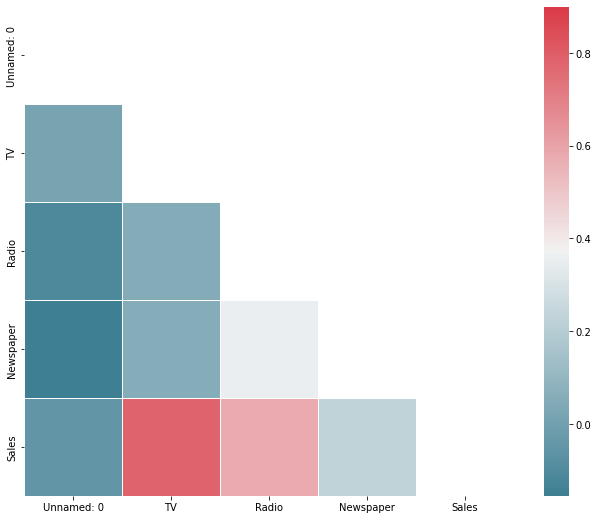

In [18]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Since Sales is our target variable, we should identify which variable correlates the most with Sales.

As we can see, TV has the highest correlation with Sales.

Let's visualize the relationship of variables using scatterplots.

# **Sales Vs Radio**

Text(0.5, 1.0, 'Sales vs Radio')

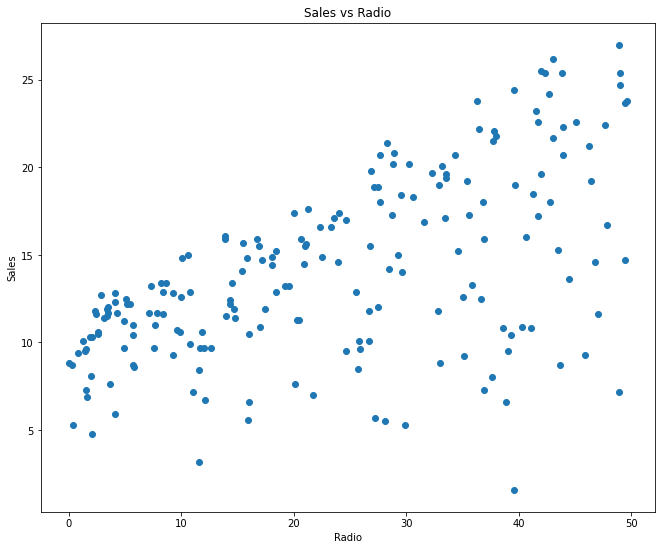

In [19]:
### Visualize the relationship using scatterplot
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(data["Radio"], data["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")


# **Sales Vs Tv**

Text(0.5, 1.0, 'Sales vs TV')

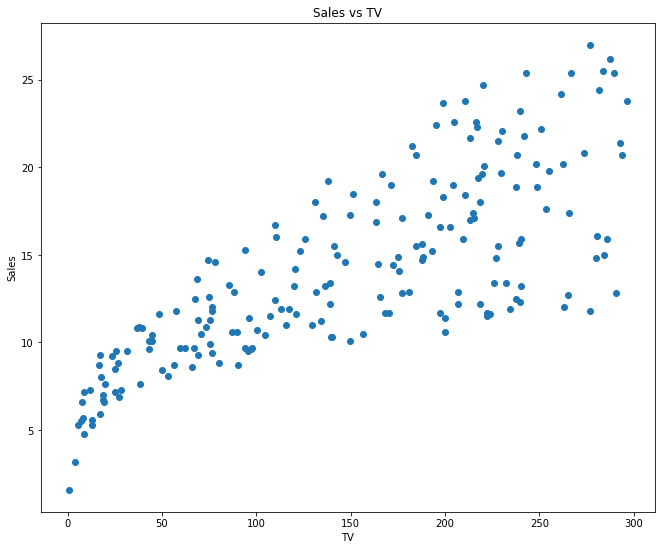

In [20]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(data["TV"], data["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

# **Sales vs Newspaper**

Text(0.5, 1.0, 'Sales vs NewsPaper')

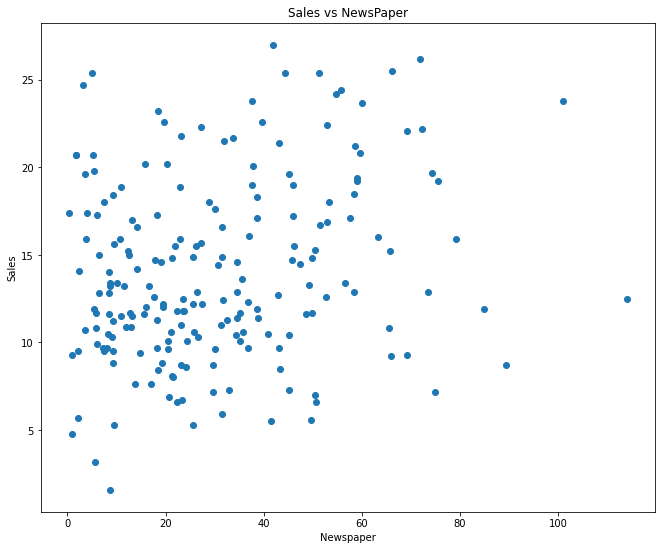

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(data["Newspaper"], data["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs NewsPaper")

# **Prep the Data for Modelling**

In [22]:
### Separate the predictor and the target variable 
x = data.drop("Sales", axis = 1)
y = data["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 4)
   Unnamed: 0     TV  Radio  Newspaper
0           1  230.1   37.8       69.2
1           2   44.5   39.3       45.1
2           3   17.2   45.9       69.3
3           4  151.5   41.3       58.5
4           5  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [23]:
##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


In [25]:
### Initialize dataframe that will store the results
data_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# **Build then Evaluate the Models**
**Linear Regression**

In [26]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.8832447395846407
MAE: 1.408274391966874
MSE: 2.9041392726757196
RMSE: 1.7041535355347885
Cross-Val Results: [0.87074153 0.84929412 0.92990198 0.88982108 0.93148951 0.93118906
 0.75841122 0.91195192 0.83320962 0.91898728]
Cross-Val Mean: 0.8824997330280173


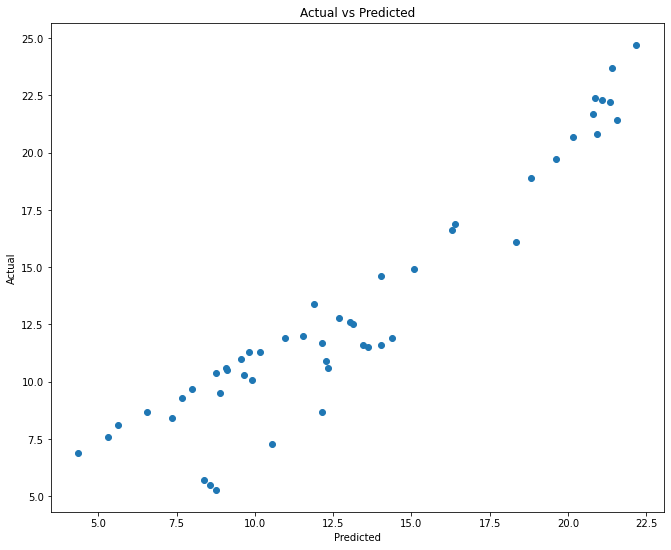

In [27]:
### Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
data_results = data_results.append(linreg_all_results, ignore_index=True)

### Using only TV as predictor
Since TV shows more correlation and linearity with our target variable, let's try predicting Sales using only this variable.

R2: 0.43100480902944716
MAE: 2.273770594370873
MSE: 9.179298570399794
RMSE: 3.0297357261648736
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


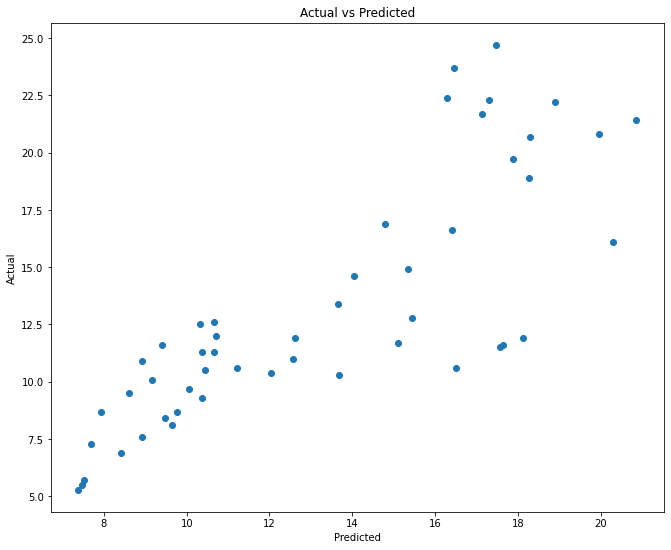

In [28]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
data_results = data_results.append(linreg_TV_results, ignore_index=True)

**Eventhough TV is more correlated and linear on Sales, this model does not perform well compared to the model that uses all predictors.**

**Using TV and Radio as predictors
The top 2 predictor variables based on the EDA above are TV and Radio, so let's see if the combination of these variables makes a better model.**

R2: 0.8850764340201793
MAE: 1.3886802126434379
MSE: 2.8539947557761023
RMSE: 1.6893770318599997
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


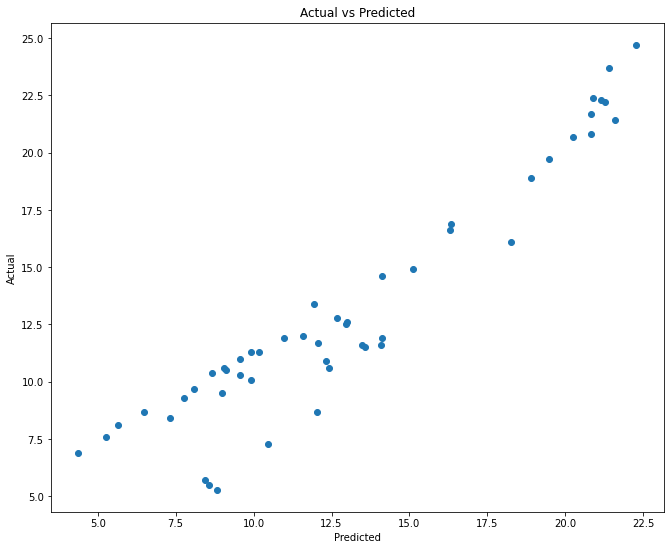

In [29]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
data_results = data_results.append(linreg_TVR_results, ignore_index=True)

R2: 0.8850764340201793
MAE: 1.3886802126434379
MSE: 2.8539947557761023
RMSE: 1.6893770318599997
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


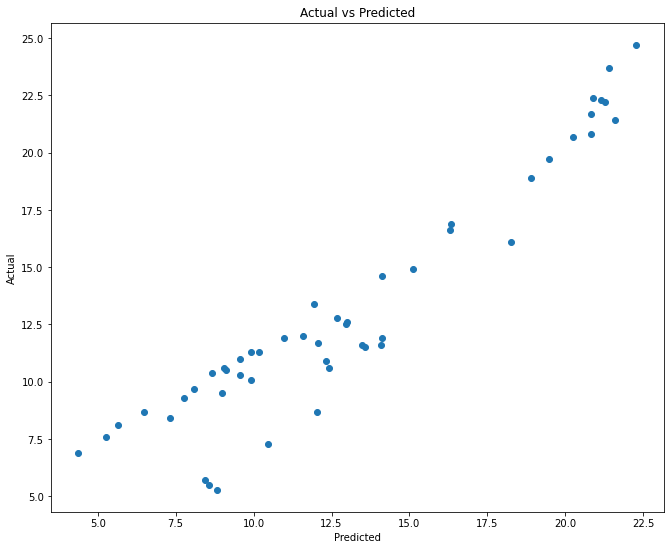

In [30]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
data_results = data_results.append(linreg_TVR_results, ignore_index=True)

In [31]:
data_results.set_index("Predictor/s",inplace = True)
data_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,88.324474,1.408274,2.904139,1.704154,88.249973
TV,43.100481,2.273771,9.179299,3.029736,56.869659
TV & Radio,88.507643,1.388680,2.853995,1.689377,88.696705
TV & Radio,88.507643,1.388680,2.853995,1.689377,88.696705


# **Conclusion**

**The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.
These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales.
Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper***